<a href="https://colab.research.google.com/github/Faiq-mtk-24/Spotify-History/blob/main/Spotify_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/spotify_history.csv")
data

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


Mengubah TRUE FALSE (STRING) ke TRUE FALSE (BOOLEAN)

In [ ]:
mapping = {'TRUE': True, 'FALSE': False}
data['shuffle'] = data['shuffle'].map(mapping).fillna(False) # fillna(False) untuk jaga-jaga jika ada NaN
data['skipped'] = data['skipped'].map(mapping).fillna(False) # fillna(False) untuk jaga-jaga jika ada NaN

# Pastikan tipe data sudah menjadi bool
data['shuffle'] = data['shuffle'].astype(bool)
data['skipped'] = data['skipped'].astype(bool)

data

/tmp/ipython-input-2635221321.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['shuffle'] = data['shuffle'].map(mapping).fillna(False) # fillna(False) untuk jaga-jaga jika ada NaN
/tmp/ipython-input-2635221321.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['skipped'] = data['skipped'].map(mapping).fillna(False) # fillna(False) untuk jaga-jaga jika ada NaN


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
132714,4pTvgNra8siMoIT8u3epTr,2023-04-17 17:39:34,android,49906,Enterlude,The Killers,Sam's Town,trackdone,trackdone,False,False
132715,62BxlOvQCjLNQA5ARA4Dug,2023-04-17 17:43:37,android,243786,Runaways,The Killers,Battle Born,trackdone,trackdone,False,False
132716,57hGTDy3A5JFzbmIzrSYxF,2023-04-17 17:48:02,android,264453,Why Do I Keep Counting?,The Killers,Sam's Town,trackdone,trackdone,False,False
132717,60eVCXFCuw1WYswBuNZc4H,2023-04-17 17:52:07,android,243933,Jenny Was A Friend Of Mine,The Killers,Hot Fuss,trackdone,trackdone,False,False


In [ ]:
spotify = pd.read_csv('/content/spotify_history.csv')
spotify

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


# **1. Siapa 10 artis teratas yang paling banyak dengarkan, berdasarkan total durasi putar?**

In [ ]:
most_ms_played_artist_name = spotify.groupby('artist_name')['ms_played'].sum()
print("10 artis yang memiliki durasi pendengar tertinggi adalah ")
most_ms_played_artist_name.sort_values(ascending=False).head(10)

10 artis yang memiliki durasi pendengar tertinggi adalah 


,ms_played
artist_name,
The Beatles,1210184552
The Killers,1059556516
John Mayer,725219443
Bob Dylan,569456396
Paul McCartney,357354370
Howard Shore,348930675
The Strokes,317508419
The Rolling Stones,307917009
Pink Floyd,260531842


In [ ]:
import pandas as pd

# 1. Muat (load) file CSV ke dalam DataFrame dengan nama 'spotify'
spotify = pd.read_csv('spotify_history.csv')

# 2. Konversi kolom 'ts' ke tipe data datetime
spotify['ts'] = pd.to_datetime(spotify['ts'])

# 3. Buat kolom 'year_play' di sebelah kolom 'ts'
#    dengan mengekstrak tahun dari kolom 'ts'
spotify.insert(spotify.columns.get_loc('ts') + 1, 'year_play', spotify['ts'].dt.year)



# **2. Bagaimana peringkat 5 artis teratas (Top 5) yang berubah dari tahun ke tahun, dan apakah ada artis yang mampu mempertahankan posisinya sebagai pendengar terfavorit selama beberapa tahun berturut-turut?**

In [ ]:
yearly_top = spotify.groupby(['year_play', 'artist_name'])['ms_played'].sum().reset_index(name='total_ms_played')

# Memberikan peringkat (Rank) di setiap tahun (berdasarkan total_ms_played)
# method='first' digunakan untuk memastikan peringkat unik jika durasi putarnya sama
yearly_top['rank'] = yearly_top.groupby('year_play')['total_ms_played'].rank(method='first', ascending=False).astype(int)

# Filter hanya untuk Top 5
top_5_artists_yearly = yearly_top[yearly_top['rank'] <= 5]


# 3. FORMAT DAN TAMPILKAN TABEL HASIL
# Membuat label kolom (Rank 1, Rank 2, dst.)
top_5_artists_yearly['rank_label'] = 'Rank ' + top_5_artists_yearly['rank'].astype(str)

# Mengubah format baris/kolom menggunakan set_index().unstack()
final_table = top_5_artists_yearly.set_index(['year_play', 'rank_label'])['artist_name'].unstack()
transposed_table = final_table.T

# Tampilkan tabel akhir dalam format teks yang rapi
print("==========================================================")
print("Top 5 Artis Per Tahun Berdasarkan Total Durasi Pendengar")
print("==========================================================")
transposed_table

Top 5 Artis Per Tahun Berdasarkan Total Durasi Pendengar


/tmp/ipython-input-1075310286.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_artists_yearly['rank_label'] = 'Rank ' + top_5_artists_yearly['rank'].astype(str)


year_play,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
rank_label,,,,,,,,,,,,
Rank 1,John Mayer,Stevie Ray Vaughan,The Rolling Stones,The Beatles,The Beatles,The Beatles,The Beatles,The Killers,The Killers,Joaquín Sabina,The Killers,John Mayer
Rank 2,Lana Del Rey,Blur,David Bisbal,Johnny Cash,John Mayer,Paul McCartney,Paul McCartney,The Beatles,The Beatles,The Beatles,The Beatles,The Killers
Rank 3,The Kooks,The Neighbourhood,Hozier,John Lennon,The Killers,Bob Dylan,Bob Dylan,The Strokes,Howard Shore,Howard Shore,Bob Dylan,The Beatles
Rank 4,Passion Pit,The Shins,Justin Bieber,Led Zeppelin,Bob Dylan,The Killers,The Killers,John Mayer,John Mayer,The Killers,Howard Shore,ABBA
Rank 5,Justin Timberlake,Funeral Suits,The Script,Elvis Presley,The Rolling Stones,John Mayer,John Mayer,Bob Dylan,Kings of Leon,Jorge Drexler,John Mayer,Howard Shore


# **3. Bagaimana tren waktu dari tahun ke tahun di tiap plaform berdasarkan durasi pendengar?**

platform,android,cast to device,iOS,mac,web player,windows
year_play,,,,,,
2013,0.000000,0.000000,0.000000,0.000000,2.705910,5.124221
2014,0.000000,0.000000,0.000000,0.000000,0.000000,1.039396
2015,50.954767,0.000000,5.387513,0.000000,0.000000,2.906324
2016,144.036058,0.745777,48.993169,0.000000,0.000000,3.847873
2017,572.727191,2.415406,71.415262,0.000000,0.000000,24.085940
2018,460.108482,0.000000,0.176610,0.000000,0.000000,13.943961
2019,464.980384,0.000000,13.731989,0.000000,0.000000,0.448348
2020,717.067051,198.551359,0.004095,0.000000,4.276347,0.754449
2021,888.471661,0.000000,0.000000,0.000000,0.000000,3.287597


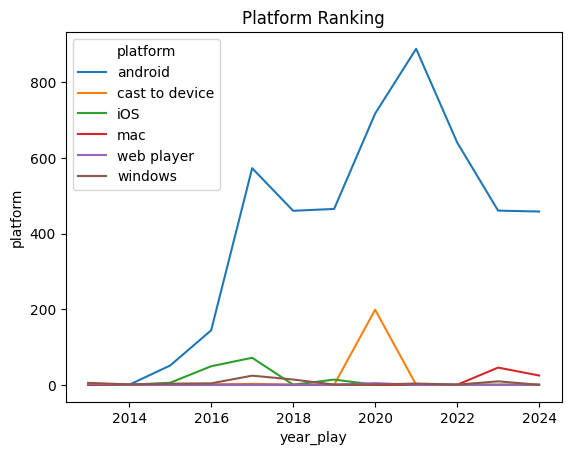

In [ ]:
spotify_clean = spotify[spotify['platform'].notna() & (spotify['platform'] != '')].copy()
spotify_clean['hours_played'] = spotify_clean['ms_played'] / 3600000

platform_yearly_summary = spotify_clean.groupby(['year_play', 'platform'])['hours_played'].sum().reset_index(name='Total Hours Played')

final_platform_table = platform_yearly_summary.set_index(['year_play', 'platform'])['Total Hours Played'].unstack().fillna(0)

final_platform_table.plot(kind='line', title='Platform Ranking', xlabel='year_play', ylabel='platform')

final_platform_table


# 4. *Siapa* 3 artis teratas (Top 3) yang paling banyak di dengarkan pada setiap platform (misalnya, Android, Web Player, Desktop), berdasarkan total durasi putar?

In [ ]:
platform_top = spotify.groupby(['platform', 'artist_name'])['ms_played'].sum().reset_index(name='total_ms_played')


platform_top['rank'] = platform_top.groupby('platform')['total_ms_played'].rank(method='first', ascending=False).astype(int)

# Filter hanya untuk Top 3
top_3_artists_platform = platform_top[platform_top['rank'] <= 3]


# 3. FORMAT DAN TAMPILKAN TABEL HASIL
# Membuat label kolom (Rank 1, Rank 2, dst.)
top_3_artists_platform['rank_label'] = 'Rank ' + top_3_artists_platform['rank'].astype(str)

# Mengubah format baris/kolom menggunakan set_index().unstack()
final_table = top_3_artists_platform.set_index(['platform', 'rank_label'])['artist_name'].unstack()
transposed_table = final_table.T
transposed_table

/tmp/ipython-input-2754696232.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_artists_platform['rank_label'] = 'Rank ' + top_3_artists_platform['rank'].astype(str)


platform,android,cast to device,iOS,mac,web player,windows
rank_label,,,,,,
Rank 1,The Beatles,The Killers,The Killers,The Killers,John Mayer,The Beatles
Rank 2,The Killers,John Mayer,John Mayer,John Mayer,The Dirty Mac,The Killers
Rank 3,John Mayer,The Beatles,Bob Dylan,Bob Dylan,The Kooks,John Mayer


In [ ]:
spotify

,spotify_track_uri,ts,year_play,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,2013,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,2013,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,2013,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,2013,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,2013,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,2024,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,2024,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,2024,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,2024,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [ ]:
spotify['ts'] = pd.to_datetime(spotify['ts'])

# --- Langkah 2: Membuat Kolom Kategori Hari ---
# Mengambil hari dalam seminggu (0=Senin, 6=Minggu)
spotify['day_of_week'] = spotify['ts'].dt.dayofweek

# Membuat fungsi untuk mengkategorikan hari
def categorize_day(day_num):
    # 5 (Sabtu) dan 6 (Minggu) adalah Akhir Pekan
    if day_num >= 5:
        return 'Akhir Pekan'
    else:
        return 'Hari Kerja'

# Menerapkan fungsi untuk membuat kolom baru
spotify['day_type'] = spotify['day_of_week'].apply(categorize_day)

# --- Langkah 3: Menghitung Total Waktu Putar per Kategori Hari ---
# Mengelompokkan berdasarkan 'day_type' dan menjumlahkan 'ms_played'
total_time_by_day = spotify.groupby('day_type')['ms_played'].sum().reset_index()

# --- Langkah 4: Menampilkan Hasil dalam Format Tabel ---
print("Total Waktu Mendengarkan Berdasarkan Tipe Hari:")
total_time_by_day


Total Waktu Mendengarkan Berdasarkan Tipe Hari:


,day_type,ms_played
0,Akhir Pekan,4699869018
1,Hari Kerja,14529661917


from matplotlib import pyplot as plt
total_time_by_day['ms_played'].plot(kind='hist', bins=20, title='ms_played')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
total_time_by_day.groupby('day_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ms_played']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ms_played'}, axis=1)
              .sort_values('ms_played', ascending=True))
  xs = counted['ms_played']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_time_by_day.sort_values('ms_played', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('day_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='day_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ms_played')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
total_time_by_day['ms_played'].plot(kind='line', figsize=(8, 4), title='ms_played')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(total_time_by_day['day_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(total_time_by_day, x='ms_played', y='day_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)